In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pd.read_csv('2019.csv')
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C08D079948>,
      dtype=object)

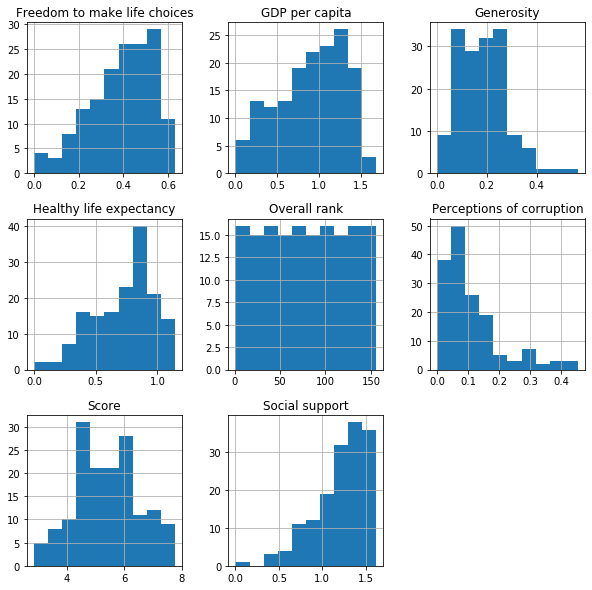

In [3]:
data.hist(figsize=(10,10))

In [4]:
x_class1 = 'Social support'
x_class2 = 'Healthy life expectancy'
y_class = 'Score'

data = data[[x_class1, x_class2, y_class]]

train_data = data.sample(frac=0.8)
test_data = data.drop(train_data.index)

train_x = train_data[[x_class1, x_class2]]
train_y = train_data[y_class]
test_x = test_data[[x_class1, x_class2]]
test_x = np.array(test_x)
test_x = np.c_[np.ones(len(test_x)), test_x]
test_y = np.array(test_data[y_class])

iteration=20 cost=4.824 w=[0.82118725 1.03350263 0.62684749]
iteration=40 cost=1.507 w=[1.2604657  1.58723987 0.9641704 ]
iteration=60 cost=0.554 w=[1.49506985 1.88384835 1.14631622]
iteration=80 cost=0.280 w=[1.61998745 2.04264897 1.24528778]
iteration=100 cost=0.201 w=[1.6861266  2.12759108 1.29967466]
iteration=120 cost=0.179 w=[1.72077113 2.17294802 1.33015877]
iteration=140 cost=0.172 w=[1.73854361 2.1970884  1.34782453]
Train cost=0.171
Test cost=0.268


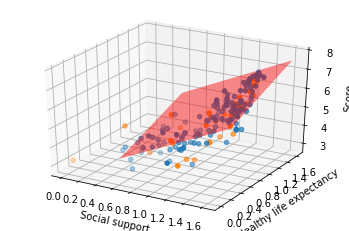

In [12]:
w = np.array([0, 0, 0], dtype='float')
x = np.array(train_x)
y = np.array(train_y)
m = len(x)
# append 1 to x
x = np.c_[np.ones(m), x]


num_iters = 150
lr = 0.01

for i in np.arange(1, 1+num_iters):
    diff = (x @ w) - y
    for wi in range(len(w)):
        t = diff if wi == 0 else diff * x[:, wi]
        w[wi] -= lr * np.sum(t) / m
    
    if i % 20 == 0:
        cost = np.square(diff).sum() / 2 / m
        print(f'iteration={i} cost={cost:.3f} w={w}')

        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_data[x_class1], train_data[x_class2], train_data[y_class])
ax.scatter(test_data[x_class1], test_data[x_class2], test_data[y_class])
ax.set_xlabel(x_class1)
ax.set_ylabel(x_class2)
ax.set_zlabel(y_class)
space_x = train_data[x_class1]
space_y = train_data[x_class1]
X = np.linspace(space_x.min(), space_x.max(), 50)
Y = np.linspace(space_y.min(), space_y.max(), 50)
X, Y = np.meshgrid(X, Y)
Z = w[0] + w[1] * X + w[2] * Y
ax.plot_surface(X, Y, Z, alpha=0.5, color='red')


print(f'Train cost={np.square(x @ w - y).sum() / 2 / len(x):.3f}')
print(f'Test cost={np.square(test_x @ w - test_y).sum() / 2 / len(test_x):.3f}')